<a href="https://colab.research.google.com/github/daiyq0620/MNIST-Computer-Vision/blob/main/574_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install rarfile

In [ ]:
import rarfile
import pandas as pd
import numpy as np
from io import BytesIO
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold, cross_val_score
from tensorflow.keras.models import load_model

In [ ]:
# import data

rar_path = "/content/drive/MyDrive/IMT574/IMT574 Dataset/Image.rar"
dfs = {}

with rarfile.RarFile(rar_path, 'r') as rf:
    for file_name in rf.namelist():
        if file_name.endswith(".csv"):
            with rf.open(file_name) as f:
                dfs[file_name] = pd.read_csv(f)
dfs.keys()

dict_keys(['Image/sample_submission.csv', 'Image/test.csv', 'Image/train.csv'])

# Data Preprocessing

In [ ]:
traindf = dfs['Image/train.csv']
traindf

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
traindf.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


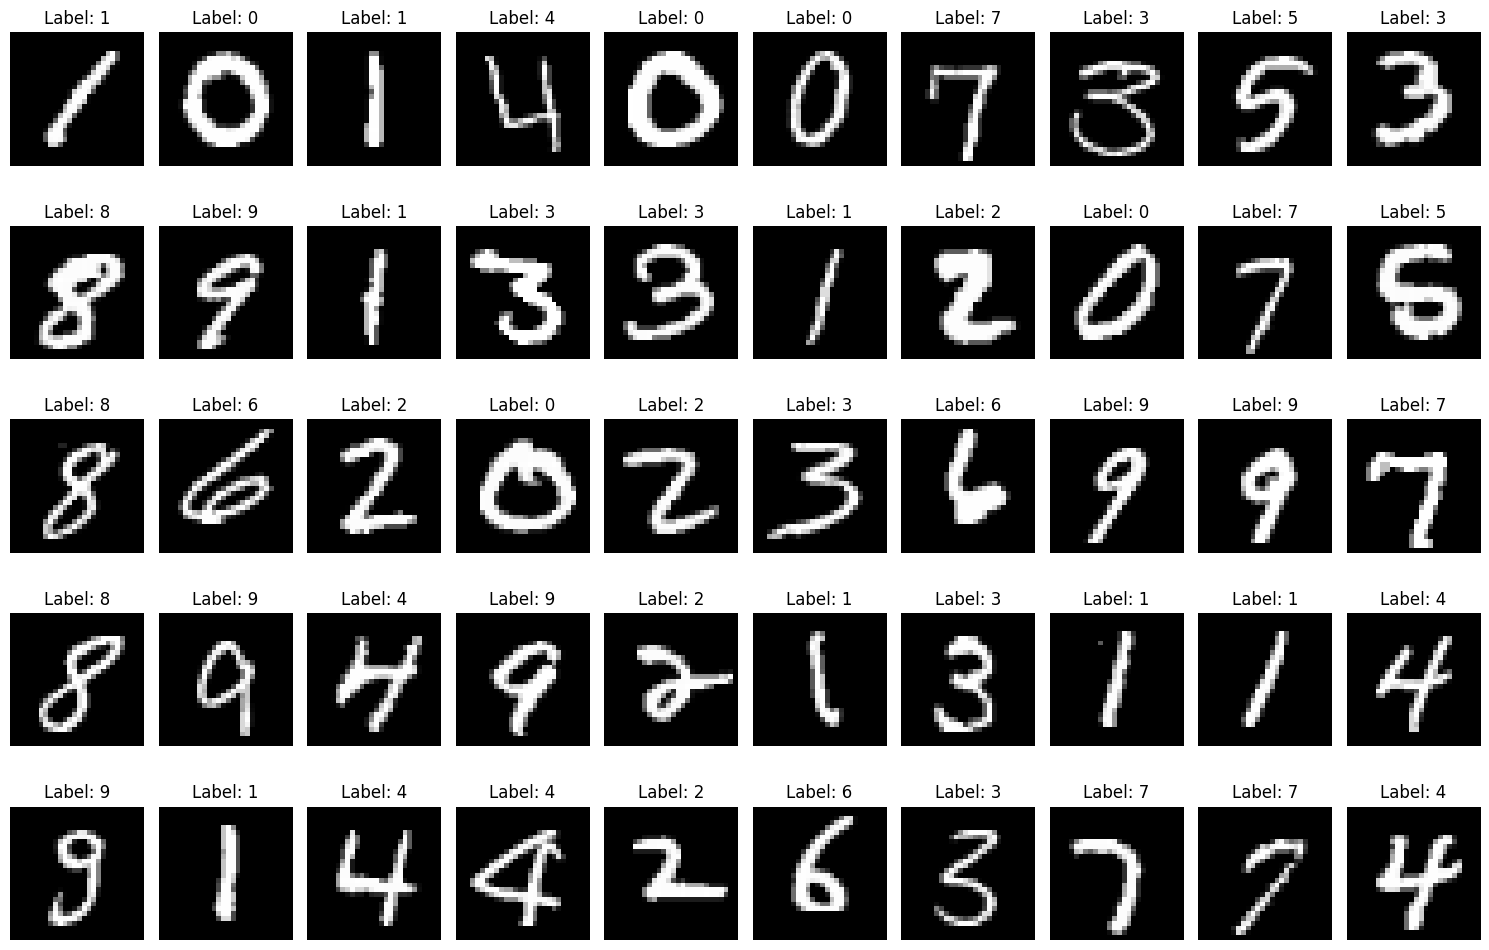

In [ ]:
# plot the first 50 images
plt.figure(figsize=(15, 10))

for i in range(50):
    img = traindf.iloc[i, 1:].values.reshape(28, 28)
    label = traindf.iloc[i, 0]
    plt.subplot(5, 10, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Normalize pixel values with Min-Max Scaling
X = traindf.iloc[:, 1:].values
y = traindf.iloc[:, 0].values
X = X / 255.0
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#check missing data
print(traindf.isnull().sum().sum())

0


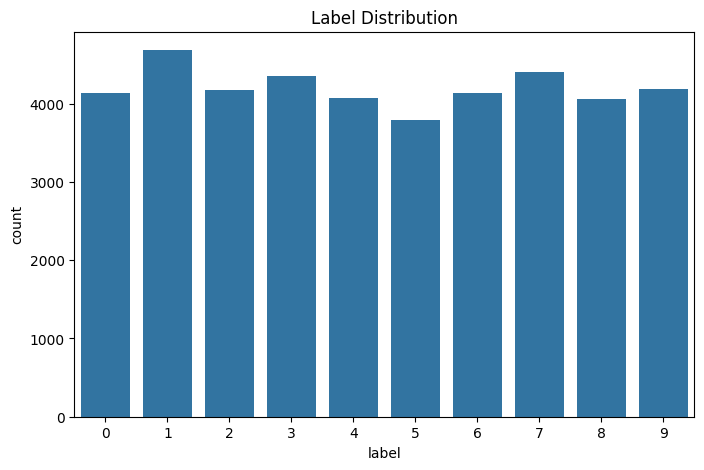

In [ ]:
#check data distribution
plt.figure(figsize=(8,5))
sns.countplot(x=traindf['label'])
plt.title("Label Distribution")
plt.show()

In [ ]:
#EDA
##check training data shape
print(traindf.shape)

(42000, 785)


# Models
## KNN

k= 1  Accuracy= 0.9686904761904762
k= 3  Accuracy= 0.9666666666666667
k= 5  Accuracy= 0.9648809523809524
k= 7  Accuracy= 0.9632142857142857
k= 9  Accuracy= 0.9613095238095238
k= 11  Accuracy= 0.96
k= 13  Accuracy= 0.9597619047619048
k= 15  Accuracy= 0.9565476190476191
k= 17  Accuracy= 0.9548809523809524
k= 19  Accuracy= 0.9528571428571428
k= 21  Accuracy= 0.9520238095238095
k= 23  Accuracy= 0.9508333333333333
k= 25  Accuracy= 0.9496428571428571
k= 27  Accuracy= 0.9492857142857143
k= 29  Accuracy= 0.9479761904761905
k= 31  Accuracy= 0.9471428571428572
k= 33  Accuracy= 0.9461904761904761
k= 35  Accuracy= 0.9446428571428571
k= 37  Accuracy= 0.9438095238095238
k= 39  Accuracy= 0.9426190476190476
k= 41  Accuracy= 0.9415476190476191
k= 43  Accuracy= 0.9421428571428572
k= 45  Accuracy= 0.9408333333333333
k= 47  Accuracy= 0.9404761904761905
k= 49  Accuracy= 0.9401190476190476


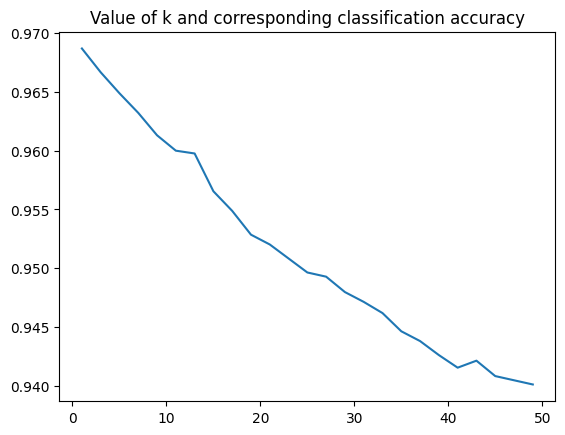

In [ ]:
#Build KNN model and visualize relationship between k and testing accuracy

knn_results = []

for k in range(1,51,2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  knn_pred = knn.predict(X_test)
  correct = np.where(knn_pred==y_test, 1, 0).sum()
  accuracy = correct/len(y_test)
  print ("k=", k, " Accuracy=", accuracy)
  knn_results.append([k,accuracy])

knn_results = pd.DataFrame(knn_results, columns=["k","accuracy"])
plt.plot(knn_results.k, knn_results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.show()

In [ ]:
## training accuracy for knn
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_pred_train = knn.predict(X_train)
correct = np.where(knn_pred_train==y_train, 1, 0).sum()
accuracy = correct/len(y_train)
print ("Training accuracy=", accuracy)

Accuracy= 1.0


## Decision Dree

In [ ]:
# Build decision trees and get training accuracy
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
dtree_pred_train = dtree.predict(X_train)
print(accuracy_score(y_test, dtree_pred))
print(accuracy_score(y_train, dtree_pred_train))
print(confusion_matrix(y_test, dtree_pred))

0.8544047619047619
1.0
[[750   2   8   9   6   8  10   6  10   7]
 [  1 862   8   7   2  10   4   2  11   2]
 [ 13  14 685  26  14   8  14  33  26  13]
 [  8   9  26 754  15  47   9  15  33  21]
 [  5   9  14   9 713   9  12   9  29  30]
 [  9   5   8  39  10 556  24   6  29  16]
 [  4   5   8  10   7  29 697   1  22   2]
 [ 12  10  20  15  11   5   0 790   4  26]
 [  7   9  30  36  25  18  10   7 664  29]
 [  3   5   6  17  35  23   5  23  15 706]]


## SVM

In [ ]:
# Build RBF SVM and get training accuracy
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
svm_rbf_preds = svm_rbf.predict(X_test)
svm_rbf_preds_train = svm_rbf.predict(X_train)
print(accuracy_score(y_test, svm_rbf_preds))
print(accuracy_score(y_train, svm_rbf_preds_train))
print(confusion_matrix(y_test, svm_rbf_preds))

0.973452380952381
0.9886309523809523
[[807   0   0   0   2   1   4   0   1   1]
 [  0 902   1   1   1   1   0   1   1   1]
 [  3   3 820   2   8   0   3   3   4   0]
 [  1   3   5 898   0   9   0   6  11   4]
 [  1   0   1   0 815   1   5   3   0  13]
 [  1   1   1   8   2 679   6   0   2   2]
 [  3   1   0   0   0   1 777   0   3   0]
 [  0   2   7   0   4   1   0 867   2  10]
 [  1   2   3   7   5   4   0   2 810   1]
 [  2   2   1  10  10   1   0   7   3 802]]


In [ ]:
# Build Polynomial SVM and get training accuracy
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
svm_poly_preds = svm_poly.predict(X_test)
svm_poly_preds_train = svm_rbf.predict(X_train)
print(accuracy_score(y_test, svm_poly_preds))
print(accuracy_score(y_train, svm_poly_preds_train))
print(confusion_matrix(y_test, svm_poly_preds))

0.9702380952380952
0.9886309523809523
[[808   0   1   0   2   2   2   0   1   0]
 [  0 902   2   0   1   1   1   1   1   0]
 [  3   7 818   1   5   3   2   3   4   0]
 [  2   4   3 890   0  14   0   6  11   7]
 [  1   1   1   0 816   1   5   1   0  13]
 [  0   1   0  11   2 675   9   0   2   2]
 [  5   1   2   0   0   4 771   0   2   0]
 [  0  10   4   0   5   0   0 862   2  10]
 [  2   6   1   6   6   4   1   2 805   2]
 [  3   4   1   7   6   3   0   8   3 803]]


## CNN

In [ ]:
# Build CNN and get training accuracy

## Reshape images to 28x28 pixels (CNN requirement)
X_cnn = X.reshape(-1, 28, 28, 1)
## Convert labels to one-hot encoding as we will use softmax activation function
y_cnn = to_categorical(y, num_classes=10)
## Split data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

## Define CNN model
cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])
## Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
## Display model summary
cnn.summary()

##cnn validation accuracy
history = cnn.fit(X_train_c, y_train_c, validation_data=(X_test_c, y_test_c), epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.8153 - loss: 0.5622 - val_accuracy: 0.9780 - val_loss: 0.0706
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 65s 59ms/step - accuracy: 0.9696 - loss: 0.1045 - val_accuracy: 0.9842 - val_loss: 0.0476
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - accuracy: 0.9800 - loss: 0.0669 - val_accuracy: 0.9862 - val_loss: 0.0421
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.9818 - loss: 0.0586 - val_accuracy: 0.9870 - val_loss: 0.0389
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.9853 - loss: 0.0459 - val_accuracy: 0.9889 - val_loss: 0.0352
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 34ms/step - accuracy: 0.9877 - loss: 0.0431 - val_accuracy: 0.9894 - val_loss: 0.0346
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9890 - loss: 0.0354 - val_accuracy: 0.9882 - val_loss: 0.0381
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 34ms/step - accuracy: 0.9887 -

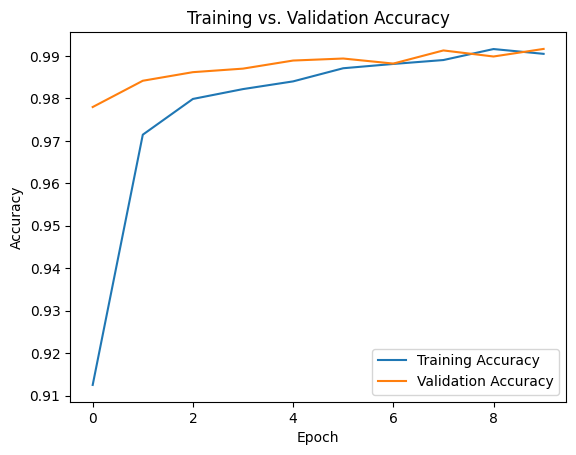

In [ ]:
# Visualization of CNN training
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
cnn.save("mnist_cnn_model.h5")

# Cross-Validation Score

In [ ]:
# K-Fold Cross-Validation

k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define models
svm_model_rbf = SVC(kernel="rbf", random_state=42)
svm_model_poly = SVC(kernel="poly", random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=1)
dt_model = DecisionTreeClassifier(max_depth=20, random_state=42)

# Perform cross-validation
svm_scores_rbf = cross_val_score(svm_model_rbf, X, y, cv=skf, scoring='accuracy')
svm_scores_poly = cross_val_score(svm_model_poly, X, y, cv=skf, scoring='accuracy')
knn_scores = cross_val_score(knn_model, X, y, cv=skf, scoring='accuracy')
dt_scores = cross_val_score(dt_model, X, y, cv=skf, scoring='accuracy')

# Print average accuracy for each model
print(f"SVM RBF Average Accuracy: {np.mean(svm_scores_rbf):.4f}")
print(f"SVM Polynominal Average Accuracy: {np.mean(svm_scores_poly):.4f}")
print(f"KNN Average Accuracy: {np.mean(knn_scores):.4f}")
print(f"Decision Tree Average Accuracy: {np.mean(dt_scores):.4f}")

SVM RBF Average Accuracy: 0.9753
SVM Polynominal Average Accuracy: 0.9707
KNN Average Accuracy: 0.9667
Decision Tree Average Accuracy: 0.8555


# Model Comparison

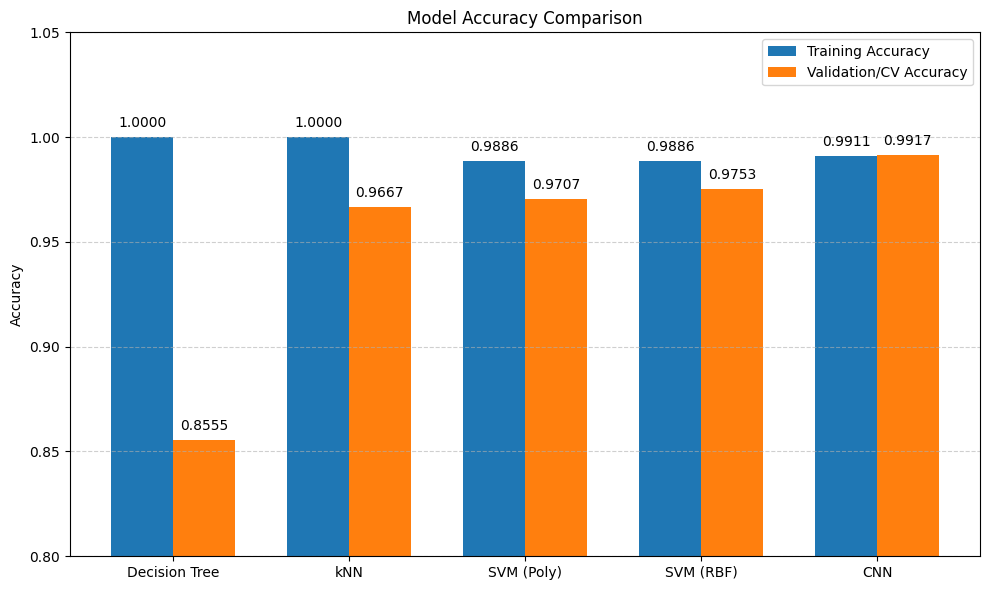

In [ ]:
# Visualize the accuracies of different models
models = ['Decision Tree', 'kNN', 'SVM (Poly)', 'SVM (RBF)', 'CNN']

train_acc = [1.0000, 1.0000, 0.9886, 0.9886, 0.9911]
val_acc = [0.8555, 0.9667, 0.9707, 0.9753, 0.9917]

train_acc = np.round(train_acc, 4)
val_acc = np.round(val_acc, 4)
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_acc, width, label='Training Accuracy')
bars2 = ax.bar(x + width/2, val_acc, width, label='Validation/CV Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0.8, 1.05)
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom')

plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Prediction on Testing Dataset using CNN

In [ ]:
# Load the test dataset
test_df = dfs['Image/test.csv']
# Load the previously trained model
model = load_model("/content/mnist_cnn_model.h5")

In [ ]:
# Preprocess the test dataset
X_test = test_df.values / 255.0  # Normalize pixel values
X_test = X_test.reshape(-1, 28, 28, 1)  # Reshape for CNN input

# Make predictions using the trained model
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step


In [ ]:
# Create the submission DataFrame
submission_df = pd.DataFrame({"ImageId": np.arange(1, len(predicted_labels) + 1), "Label": predicted_labels})

# Save the submission file
submission_filename = "/content/drive/MyDrive/574/mnist_submission.csv"
submission_df.to_csv(submission_filename, index=False)

# Download the submission file
from google.colab import files
files.download(submission_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>